In [1]:
import sys, os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import scipy.signal
from scipy.signal import detrend, cheby2, filtfilt, butter, argrelextrema, hilbert, detrend, find_peaks, lfilter,savgol_filter, blackmanharris,resample
from scipy.fftpack import dct,fft
from biosppy.signals import ecg
import hrvanalysis
import PPG_RR_INTERVALT
import datetime

In [29]:
# ecgfilepath="D:/ECG data/data/fitbit/2020-11-25/"
# ecgfile="ecgwireless_258_2020-11-25.csv"
ecgfilepath="C:/Users/compu/Documents/WeChat Files/wxid_dlprz2akmc6w21/FileStorage/File/2020-10/"
ecgfile="ecgwireless_1968_2020-10-20.csv"
ecgdata=pd.read_csv(ecgfilepath+ecgfile)

In [155]:
starttime=250*60*60
ecg1=ecgdata[starttime:starttime+1*250*60]
ecgfs=250
ecg_raw=ecg1['ecgraw']
ecgtime=ecg1['datetime']
ecg2 = np.squeeze(ecg_raw)
ecg2=np.array(ecg2)

In [156]:
r_peaks = ecg.hamilton_segmenter(ecg2, sampling_rate=ecgfs)[0]

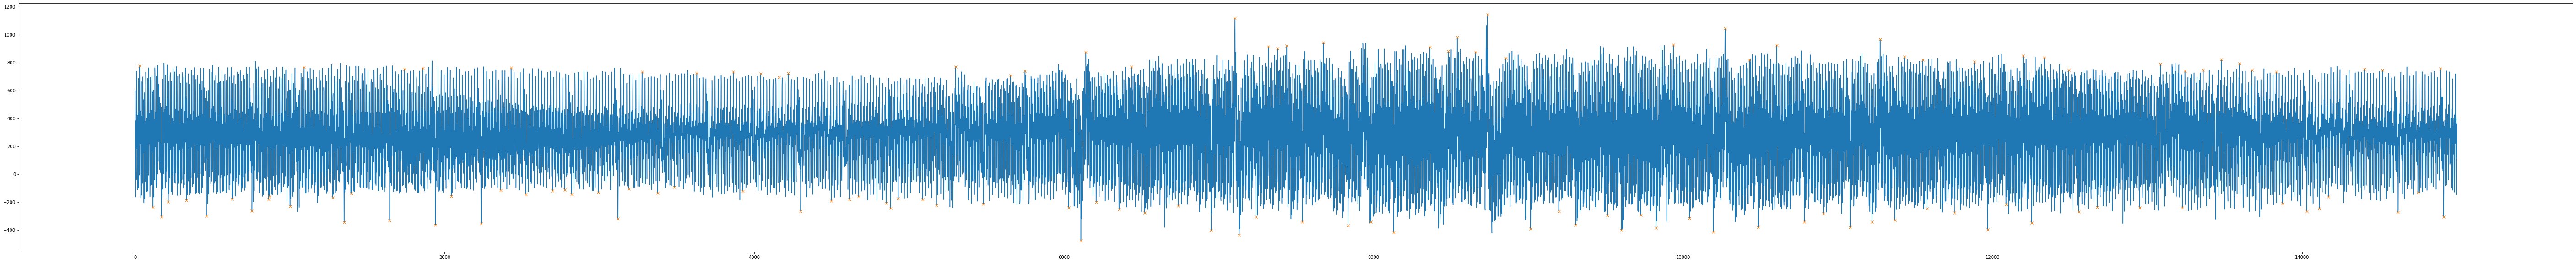

In [150]:
plt.figure(figsize=(100,10))
plt.plot(ecg2)
plt.plot(r_peaks,ecg2[r_peaks],'x')

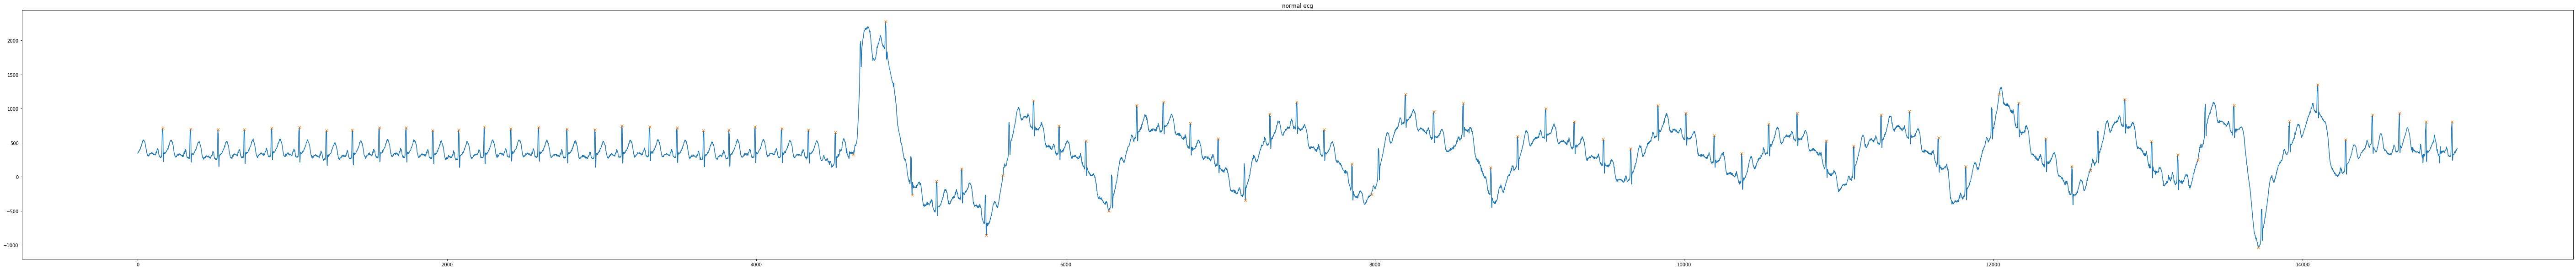

In [158]:
plt.figure(figsize=(100,10))
plt.title("normal ecg")
plt.plot(ecg2)
plt.plot(r_peaks,ecg2[r_peaks],'x')

In [145]:
ecgdata

,datetime,ecgraw
0,2020/11/26 08:47:51,75
1,2020/11/26 08:47:51,-4
2,2020/11/26 08:47:51,155
3,2020/11/26 08:47:51,355
4,2020/11/26 08:47:51,414
...,...,...
12752599,2020/11/26 22:58:37,310
12752600,2020/11/26 22:58:37,-70
12752601,2020/11/26 22:58:37,-105
12752602,2020/11/26 22:58:37,233


In [25]:
ppgfilepath="D:/work/ppg+mot_258/ppg/2020-11-26/258/"
ppgfiles=os.listdir(ppgfilepath)
motfilepath="D:/work/ppg+mot_258/mot/2020-11-26/258/"
motfiles=os.listdir(motfilepath)

In [26]:
ecgfilepath="D:/ECG data/data/ECGsignal_63267/ECGsignal/2020-07-27/1902/"
ecgfile="sch_opensignals_00078046f2a8_2020-07-27_10-28-00.h5"

f = h5py.File(ecgfilepath+ecgfile,'r')
f.keys()  
ecg_channel_1 = f['00:07:80:46:F2:A8/raw/channel_1'][:]
ecg_channel_1 = ecg_channel_1.astype(np.float64)

N_ecg = -(ecg_channel_1)

#N_ecg=(ecg_channel_1)
ecg1 = np.squeeze(N_ecg)

ecghour=ecgfile[-11:-9];ecgminute=ecgfile[-8:-6];ecgsecond=ecgfile[-5:-3]
start=int(ecghour)*3600+int(ecgminute)*60+int(ecgsecond)
ecgstarttime=datetime.time(int(ecghour),int(ecgminute),int(ecgsecond))

In [27]:
ppgfiles[0][-6:-4]

'09'

In [38]:
rr=[];time=[];ecg_rr=[]
for i in range(len(ppgfiles)):
    ppg=-np.loadtxt(ppgfilepath+ppgfiles[i])
    
    mot0=pd.read_csv(motfilepath+motfiles[i])
    accx=mot0['AccelX']*0.061
    accy=mot0['AccelY']*0.061
    accz=mot0['AccelZ']*0.061
    g=np.sqrt(accx*accx+accy*accy+accz*accz)
    if(max(g-1000)>50):
        continue;
    else:    
        ppg=scipy.signal.resample(ppg,300*60)

        rr0,rritime,finalpeak,_,_,_,fppg,_,_=PPG_RR_INTERVALT.ppg_process(1,ppg,ppg[:60*300],sample_rate=300,Filtered_Show=False,Raw_Data_Show=False,R_Peak_Show=False,RR_interval_Show=False,label1="ppg",cheby2f=1)
        minrr=min(rr0)
        test=float(60/(min(rr0)/1000))
        minindex=rr0.index(min(rr0))
        
        rritime1=np.array(rritime)*300
        realindex=int(rritime1[minindex])
        
#         plt.plot(realindex,fppg[realindex],'o')
#         plt.title("max hr:"+str(test))
#         plt.savefig("D:/work/ppg+mot_258/ppg/2020-11-26/hrv/pics/"+ppgfiles[i][-12:-4]+".png") 
#         plt.close()
#         rr.append(rr0);
#         time.append(ppgfiles[i][-12:-4])
        

#         plt.figure(figsize=(30,10))
#         plt.plot(ppg)
#         plt.savefig("D:/work/ppg+mot_258/ppg/2020-11-26/hrv/originalpics/"+ppgfiles[i][-12:-4]+".png")
#         plt.close()

        if(ppgfiles[i][-12:-4]=="18-47-58"):
            print(len(rr0))
    

69


In [33]:
peaks

array([   17,    40,   117,   136,   159,   205,   426,   443,   471,
         697,   733,   987,  1272,  1553,  1838,  1862,  2142,  2423,
        2691,  2984,  3005,  3275,  3297,  3587,  3846,  4133,  4154,
        4448,  4484,  4794,  4831,  4880,  5012,  5274,  5562,  5837,
        5865,  5887,  5917,  5948,  5973,  6107,  6380,  6401,  6671,
        6925,  7184,  7455,  7474,  7724,  7746,  7996,  8251,  8506,
        8763,  9032,  9289,  9318,  9345,  9397,  9423,  9448,  9541,
        9571,  9613,  9781, 10035, 10294, 10544, 10566, 10804, 11025,
       11264, 11510, 11750, 11768, 11988, 12011, 12226, 12274, 12486,
       12513, 12739, 12766, 12955, 12977, 13190, 13216, 13426, 13454,
       13482, 13666, 13688, 13714, 13913, 13939, 14162, 14187, 14392,
       14644, 14670, 14933, 15153, 15178, 15398, 15656, 15683, 15912,
       15934, 15959, 16179, 16203, 16430, 16473, 16588, 16699, 16723,
       16940, 17216, 17458, 17480, 17504, 17545, 17596, 17619, 17641,
       17718, 17741,

In [24]:
len(fppg)

18000

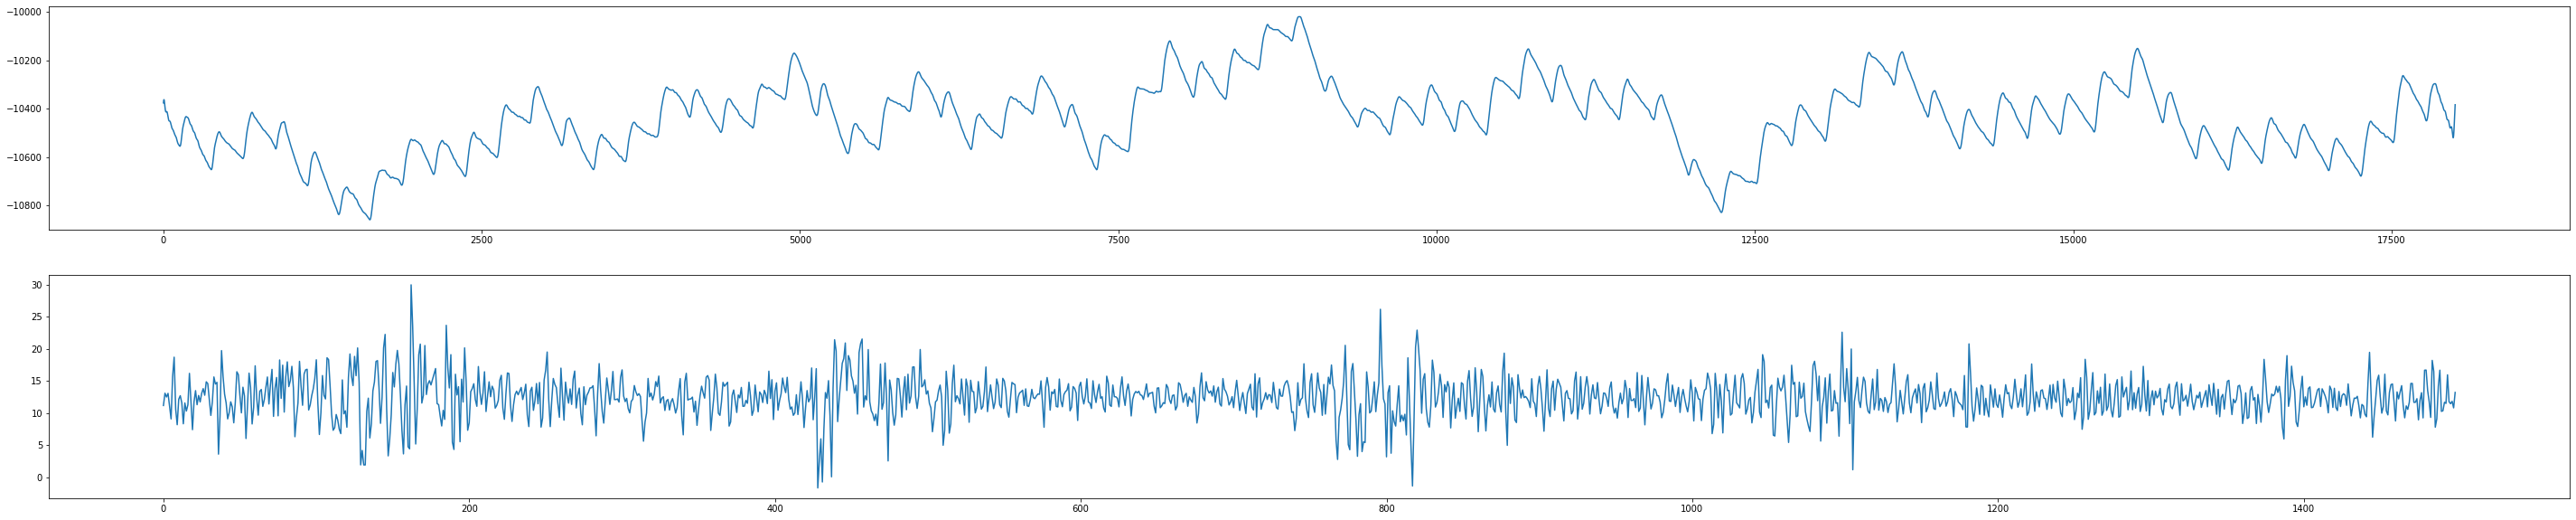

In [153]:
plt.figure(figsize=(50,10))
plt.subplot(211)
plt.plot(ppg)
plt.subplot(212)
plt.plot(g-1000)

In [143]:
time[0][6:8]

'09'

In [121]:
i=0;hrvresult=pd.DataFrame();time5=[]
while(i<=len(rr)-5): 
    
    win5=np.array([])
    win5=np.append(rr[i],[rr[i+1]])
    win5=np.append(win5,[rr[i+2]])
    win5=np.append(win5,[rr[i+3]])
    win5=np.append(win5,[rr[i+4]])
    
    
    mean_rr=np.mean(win5)
    expected_rrnum=5*60/(mean_rr/1000)
    coverage=len(win5)/expected_rrnum
    
    if(coverage<0.7):
        continue;

    #create median template
    median_template=scipy.signal.medfilt(win5,3)
    
    residual=win5-median_template
    for j in range(len(residual)):
        if(abs(residual[j])>200):
            win5[j]=median_template[j];
            
    hrv_time_domain=hrvanalysis.extract_features.get_time_domain_features(win5)
    hrv_freq_domain=hrvanalysis.extract_features.get_frequency_domain_features(win5,sampling_frequency=300)
    
    hrv_time_domain=pd.DataFrame([hrv_time_domain])
    hrv_freq_domain=pd.DataFrame([hrv_freq_domain])
    hrvresult0=pd.concat([hrv_time_domain,hrv_freq_domain],axis=1)
   
    time5.append(time[i]+' '+time[i+1]+' '+time[i+2]+' '+time[i+3]+' '+time[i+4])
    print(time[i]+' '+time[i+1]+' '+time[i+2]+' '+time[i+3]+' '+time[i+4])
    time_total=pd.DataFrame(time5)
    hrvresult=pd.concat([hrvresult,hrvresult0],axis=0)
    
    ppgtime=datetime.time(int(time[i][:2]),int(time[i][3:5]),int(ppgfiles[i][6:8]))
        
    if(ppgtime>ecgstarttime and False):
        all_sec = 3600*int(int(time[i][:2])+60*int(time[i][3:5])+int(ppgfiles[i][6:8]))
        start_index = (all_sec - start)*300
        end_index = start_index+60*300
        print(str(start_index)+"-"+str(end_index))
            
        ecg2 = ecg1[start_index:end_index]
        rpeakk = ecg.hamilton_segmenter(ecg2, sampling_rate=300)[0]
        rr_secg = np.diff(r_peakk)/(300)
            
        ecg_rr.append(rr_secg)
    
    i=i+5;
    

00-00-09 00-01-10 00-03-12 00-05-14 00-06-15
00-08-17 00-09-18 00-10-19 00-11-19 00-12-20
00-13-21 00-14-22 00-15-23 00-16-24 00-17-25
00-18-26 00-19-27 00-20-28 00-21-29 00-23-30
00-24-31 00-25-32 00-27-34 00-28-35 00-29-36
00-30-37 00-31-38 00-34-40 00-35-41 00-36-42
00-37-43 00-39-45 00-40-46 00-42-48 00-44-50
00-45-51 00-46-51 00-47-52 00-52-57 00-58-01
01-02-05 01-03-06 01-04-07 01-05-08 01-06-09
01-08-10 01-09-11 01-10-12 01-12-14 01-13-15
01-14-16 01-15-17 01-16-18 01-17-19 01-18-19
01-19-20 01-20-21 01-21-22 01-22-23 01-24-25
01-25-26 01-26-27 01-32-32 01-33-33 01-34-34
01-35-35 01-36-36 01-37-36 01-38-37 01-39-38
01-40-39 01-44-43 01-49-24 01-50-27 01-52-30
01-56-33 01-57-34 02-00-37 02-01-38 02-02-39
02-03-40 02-04-41 02-10-46 02-11-47 02-12-48
02-13-49 02-14-50 02-19-54 02-21-56 02-22-57
02-24-59 02-26-00 02-27-00 02-28-01 02-29-02
02-30-03 02-32-05 02-33-06 02-34-07 02-36-09
02-37-10 02-39-11 02-40-12 02-42-14 02-43-15
02-44-16 02-47-19 02-52-23 02-53-24 02-54-25
02-58-29 0

In [122]:
hrvresult
hrvresult.to_csv("D:/work/ppg+mot_258/ppg/2020-11-26/hrv/"+"1126hrv.csv")
time_total.to_csv("D:/work/ppg+mot_258/ppg/2020-11-26/hrv/"+"time.csv")

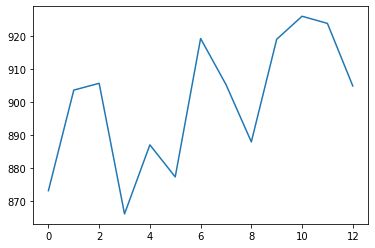

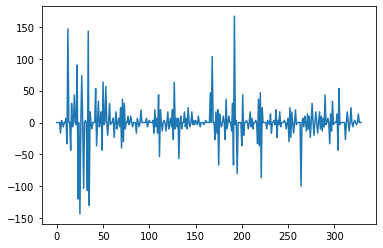

In [10]:
k=np.append(k,[rr[3]])

In [11]:
k

array([1020.        ,  590.        ,  860.        ,  460.        ,
       1136.66666667,  576.66666667,  536.66666667,  540.        ,
        553.33333333,  576.66666667,  890.        ,  930.        ,
        923.33333333, 1046.66666667,  860.        ,  980.        ,
        563.33333333,  586.66666667,  536.66666667, 1053.33333333,
        583.33333333,  620.        ,  880.        ,  520.        ,
       1283.33333333, 1256.66666667,  923.33333333,  616.66666667,
       1000.        ,  526.66666667,  723.33333333,  553.33333333,
        483.33333333,  446.66666667,  486.66666667,  733.33333333,
        713.33333333,  813.33333333,  866.66666667,  823.33333333,
        856.66666667,  830.        ,  840.        ,  833.33333333,
        830.        ,  870.        ,  780.        ,  790.        ,
        836.66666667,  866.66666667,  816.66666667,  850.        ,
        843.33333333,  826.66666667,  906.66666667,  833.33333333,
        833.33333333,  853.33333333,  876.66666667,  853.33333

In [10]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [33]:
ppg[:300-1]

array([[14344],
       [15102],
       [17513],
       [18062],
       [17936],
       [18726],
       [17726],
       [17833],
       [15333],
       [14109],
       [13027],
       [12062],
       [11773],
       [13626],
       [13415],
       [13046],
       [12796],
       [12693],
       [12663],
       [12639],
       [12647],
       [12659],
       [12684],
       [12729],
       [12708],
       [12731],
       [12683],
       [12683],
       [12689],
       [12682],
       [12658],
       [12735],
       [12767],
       [12746],
       [12562],
       [12410],
       [12381],
       [12364],
       [12371],
       [12511],
       [12445],
       [12477],
       [15102],
       [13115],
       [13460],
       [14215],
       [13142],
       [12998],
       [12935],
       [12910],
       [12919],
       [12859],
       [12810],
       [12745],
       [12672],
       [12671],
       [12680],
       [12901],
       [13121],
       [13183],
       [13212],
       [13285],
       [

In [18]:
cumsum=np.cumsum(np.insert(ppg,0,0))
ppg.values[300#running_mean(ppg,300)

ValueError: Shape of passed values is (7500, 1), indices imply (7499, 1)

7500